# Exploring Data Analsis of Purchase Data

## Trends
1. Majority of players are male
2. Majority of purchaes are made by players between 15 to 24 
3. Most items are only purchased once based on the data file. This might not be true if the data is just a sample.
4. Plyer age distribution is close to normal but slightly right skewed

In [1]:
import os
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

## Load to DataFrame

In [2]:
DATA_PATH = '.'
file = input("What's the input file?")
full_path = os.path.join(DATA_PATH, file)
df_purchase = pd.read_json(full_path)

What's the input file?purchase_data2.json


## Take a look at data

In [3]:
df_purchase.columns

Index(['Age', 'Gender', 'Item ID', 'Item Name', 'Price', 'SN'], dtype='object')

In [4]:
df_purchase.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,20,Male,93,Apocalyptic Battlescythe,4.49,Iloni35
1,21,Male,12,Dawne,3.36,Aidaira26
2,17,Male,5,Putrid Fan,2.63,Irim47
3,17,Male,123,Twilight's Carver,2.55,Irith83
4,22,Male,154,Feral Katana,4.11,Philodil43


In [5]:
df_purchase.describe()

,Age,Item ID,Price
count,78.000000,78.000000,78.000000
mean,22.551282,93.935897,2.924359
std,7.339003,56.352633,1.134913
min,7.000000,0.000000,1.020000
25%,20.000000,48.000000,1.925000
50%,22.500000,97.500000,2.770000
75%,25.000000,137.000000,4.092500
max,40.000000,181.000000,4.810000


## Player Count

The SN looks like can uniquely identify a player so get the unique count of it.

In [6]:
DataFrame( [ {
    'Total Playsers': len(df_purchase['SN'].unique())
} ])

,Total Playsers
0,74


## Purchasing Analysis (Total)

In [7]:
DataFrame(
    columns = [
       'Number of Unique Items',
       'Average Price',
       'Number of Purchases',
       'Total Revenue',
    ],
    data = [
       [len(df_purchase['Item ID'].unique()),
        df_purchase.Price.mean(),
        df_purchase.Price.count(),
        df_purchase.Price.sum(),
       ],
    ], 
).style.format(
    {'Average Price': '${:,.2f}',
     'Total Revenue': '${:,.2f}',
    }
)

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,64,$2.92,78,$228.10


## Gender Demographics

In [8]:
df_gender_demographics = DataFrame(
    df_purchase.groupby('Gender')['SN'].unique()
).assign(
    cnt = lambda x: x['SN'].map(len)
).assign(
    perc=lambda x: x['cnt'] / len(df_purchase['SN'].unique())
).drop(
    'SN', axis=1
).rename(
    columns = {
        'cnt': 'Toatl Count',
        'perc': 'Percenage of Players'
    }
)

df_gender_demographics.style.format(
    {
      'Percenage of Players': '{:.2%}' 
    }
)


,Toatl Count,Percenage of Players
Gender,,
Female,13,17.57%
Male,60,81.08%
Other / Non-Disclosed,1,1.35%


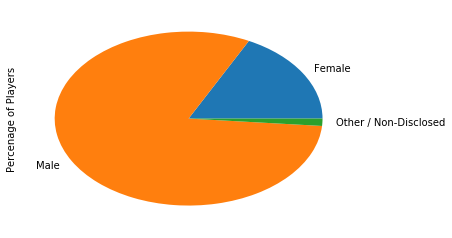

In [9]:
df_gender_demographics['Percenage of Players'].plot.pie()
plt.show()

## Purchasing Analysis (Gender)
**What the hell is 'Normalized Total'?**

In [10]:
df_grouped = df_purchase.groupby('Gender')['Price']
df_grouped.agg(
    { 
        'Purchase Count': 'count',
        'Average Purchase Price': 'mean',
        'Total Purchase Value': 'sum'
    }
).style.format(
    {'Average Purchase Price': '${:,.2f}',
     'Total Purchase Value': '${:,.2f}',
    }
)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Purchase Count,Average Purchase Price,Total Purchase Value
Gender,,,
Female,13,$3.18,$41.38
Male,64,$2.88,$184.60
Other / Non-Disclosed,1,$2.12,$2.12


This method does look straight forwad but the feature will be dropped from Pands in the future. Try to pass list then rename instead.

In [11]:
df_purchase.groupby('Gender')['Price'].agg(
    ['count', 'mean', 'sum']
).rename(
    columns = {
        'count': 'Purchase Count',
        'mean': 'Average Purchase Price',
        'sum': 'Total Purchase Value'
    }
).style.format(
    {'Average Purchase Price': '${:,.2f}',
     'Total Purchase Value': '${:,.2f}',
    }
)

,Purchase Count,Average Purchase Price,Total Purchase Value
Gender,,,
Female,13,$3.18,$41.38
Male,64,$2.88,$184.60
Other / Non-Disclosed,1,$2.12,$2.12


## Age Demographics

In [12]:
bin_start = 10
bins = [0]
max_age = df_purchase.Age.max() 
bins.extend(range(bin_start, max_age, 5))
bins.append(max_age + 1)
bins

[0, 10, 15, 20, 25, 30, 35, 41]

In [13]:
labels = ['< ' + str(bin_start)]
for i in range(1, len(bins) - 2):
    labels.append('{}-{}'.format(bins[i], bins[i+1] -1))
labels.append(str(bins[-2]) + '+')
labels

['< 10', '10-14', '15-19', '20-24', '25-29', '30-34', '35+']

In [14]:
df_purchase.loc[:, 'Bined Age'] = pd.cut(df_purchase['Age'], bins=bins, labels=labels)

In [15]:
df_age_demographics = DataFrame(
    df_purchase.groupby('Bined Age')['SN'].unique()
).assign(
    cnt = lambda x: x['SN'].map(len)
).assign(
    perc=lambda x: x['cnt'] / len(df_purchase['SN'].unique())
).drop(
    'SN', axis=1
).rename(
    columns = {
        'cnt': 'Total Count',
        'perc': 'Percenage of Players'
    }
)

df_age_demographics.style.format(
    {
      'Percenage of Players': '{:.2%}' 
    }
)
    

,Total Count,Percenage of Players
Bined Age,,
< 10,5,6.76%
10-14,4,5.41%
15-19,20,27.03%
20-24,30,40.54%
25-29,4,5.41%
30-34,6,8.11%
35+,5,6.76%


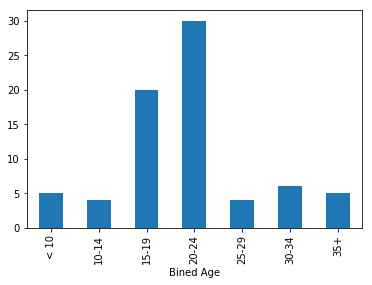

In [16]:
df_age_demographics['Total Count'].plot.bar()
plt.show()

## Purchasing Analysis (Age)

In [17]:
df_purchase.groupby('Bined Age')['Price'].agg(
    ['count', 'mean', 'sum']
).rename(
    columns = {
        'count': 'Purchase Count',
        'mean': 'Average Purchase Price',
        'sum': 'Total Purchase Value'
    }
).style.format(
    {
        'Average Purchase Price': '${:,.2f}',
        'Total Purchase Value': '${:,.2f}',
    }
)

,Purchase Count,Average Purchase Price,Total Purchase Value
Bined Age,,,
< 10,5,$2.76,$13.82
10-14,4,$3.05,$12.21
15-19,20,$2.73,$54.69
20-24,33,$3.04,$100.42
25-29,4,$2.69,$10.77
30-34,7,$2.35,$16.47
35+,5,$3.94,$19.72


## Top Spenders

In [18]:
df_purchase.groupby('SN')['Price'].agg(
    ['count', 'mean', 'sum']
).sort_values(
    by='sum', 
    ascending=False
).rename(
    columns={
        'count': 'Purchase Count',
        'mean': 'Average Purchase Price',
        'sum': 'Total Purchase Value'
    }
).head(5).style.format(
    {
        'Average Purchase Price': '${:,.2f}',
         'Total Purchase Value': '${:,.2f}',
    }
)

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Sundaky74,2,$3.71,$7.41
Aidaira26,2,$2.56,$5.13
Eusty71,1,$4.81,$4.81
Chanirra64,1,$4.78,$4.78
Alarap40,1,$4.71,$4.71


## Most Popular Items

In [19]:
df_purchase.groupby(['Item ID', 'Item Name'])['Price'].agg(
    ['count', 'mean', 'sum']
).sort_values(
    by='count', 
    ascending=False
).rename(
    columns={
        'count': 'Purchase Count',
        'mean': 'Average Purchase Price',
        'sum': 'Total Purchase Value'
    }
).head(5).style.format(
    {
        'Average Purchase Price': '${:,.2f}',
         'Total Purchase Value': '${:,.2f}',
    }
)

,,Purchase Count,Average Purchase Price,Total Purchase Value
Item ID,Item Name,,,
94,Mourning Blade,3,$3.64,$10.92
90,Betrayer,2,$4.12,$8.24
111,Misery's End,2,$1.79,$3.58
64,Fusion Pummel,2,$2.42,$4.84
154,Feral Katana,2,$4.11,$8.22


## Most Porfitable Items

In [20]:
df_purchase.groupby(['Item ID', 'Item Name'])['Price'].agg(
    ['count', 'mean', 'sum']
).sort_values(
    by='sum', 
    ascending=False
).rename(
    columns={
        'count': 'Purchase Count',
        'mean': 'Average Purchase Price',
        'sum': 'Total Purchase Value'
    }
).head(5).style.format(
    {
        'Average Purchase Price': '${:,.2f}',
         'Total Purchase Value': '${:,.2f}',
    }
)

,,Purchase Count,Average Purchase Price,Total Purchase Value
Item ID,Item Name,,,
94,Mourning Blade,3,$3.64,$10.92
117,"Heartstriker, Legacy of the Light",2,$4.71,$9.42
93,Apocalyptic Battlescythe,2,$4.49,$8.98
90,Betrayer,2,$4.12,$8.24
154,Feral Katana,2,$4.11,$8.22
